In [26]:
# PMI test
import math

print(math.log((1159/(50000952)) / (1938/50000952) / (1311/50000952)))

10.034908170336502


No handles with labels found to put in legend.


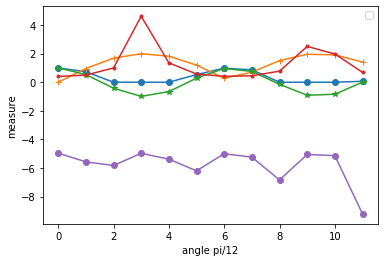

In [25]:
# various norms and distances graph
import math
import numpy as np
import matplotlib.pyplot as plt

def l1_norm(v):
    '''L1 distance'''
    norm = np.sum(v)
    return v / norm

def l2_norm(v):
    '''L2 distance'''
    norm = np.sqrt(np.sum(np.square(v)))
    return v / norm

def froto(p, q):
    '''vector from p to q'''
    return np.array(p) - np.array(q)

def hellingm(p, q):
    '''returns Hellinger metric for distributions p and q'''
    if len(p) != len(q):
        return -1
    hm = 0.
    for idx, elp in enumerate(p):
        hm += (math.sqrt(elp) - math.sqrt(max(q[idx], 0.)))**2
    return math.sqrt(hm) / math.sqrt(2.)

def euclid(p, q):
    '''Euclidean metric for distributions p and q'''
    if len(p) != len(q):
        return -1
    ec = 0.
    for idx, elp in enumerate(p):
        ec += (elp - q[idx]) ** 2
    return math.sqrt(ec) 

def minkovfr(p, q, pp):
    '''Minkowski and fractional metric for distributions p and q'''
    if len(p) != len(q):
        return -1
    ec = 0.
    for idx, elp in enumerate(p):
        ec += (elp - q[idx]) ** pp
    return ec ** (1. / pp)

def cosine(p, q):
    '''cosine similarity for distributions p and q'''
    if len(p) != len(q):
        return -1
    cs = 0.
    pn = 0.
    qn = 0.
    for idx, elp in enumerate(p):
        cs += elp * q[idx]
        pn += elp * elp
        qn += q[idx] * q[idx]
    if cs > 0. and pn > 0. and qn > 0.:
        return math.sqrt(cs) / math.sqrt(pn) / math.sqrt(qn)
    return 0

def jaccind(a, b):
    '''returns the Jaccard index for two sets a, b'''
    return len(a.intersection(b)) / len(a.union(b))

def kullei(p, q):
    '''Kullback-Leibler divergence (modified)'''
    return np.sum(np.dot(p, np.array([np.log(p / (q0 + 1) + 1) for q0 in q])))

def pmi(cwi, cwj, cco, ctot, eps=0.01):
    '''pointwise mutual information e.g. math.log((1159/(50000952)) / (1938/50000952) / (1311/50000952))'''
    return math.log((cco/ctot + eps ) / (cwi/ctot) / (cwj/ctot))

def npmi(cwi, cwj, cco, ctot, gamma=1.0, eps=0.01):
    '''normalized pointwise mutual information'''
    return (- pmi(cwi, cwj, cco, ctot, eps) / math.log((cco/ctot + eps ))) ** gamma

def pmi_vec(vi, vj, n, eps=0.01):
    '''pointwise mutual information vector version'''
    return math.log((np.abs(np.dot(vi,vj)) + eps ) / n / n)

def npmi_vec(vi, vj, n, gamma=1.0, eps=0.01):
    '''normalized pointwise mutual information vector version'''
    return (- pmi_vec(vi, vj, n, eps) / math.log(np.abs(np.dot(vi,vj)) + eps)) ** gamma

def main():
    vx = np.array([1., 0.])
    xc = range(12)
    yc = []
    yh = []
    ye = []
    yd = []
    ykl = []
    ypmi = []
    for phi in range(0,12): # go around in a circle
        vy = np.array([math.cos(phi), math.sin(phi)])
        yc.append(cosine(vx, vy))
        yh.append(hellingm(vx, vy))
        ye.append(euclid(vx, vy))
        yd.append(np.dot(vx, vy))
        ykl.append(kullei(vx, vy))
        ypmi.append(pmi_vec(vx, vy, 12))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set(xlabel='angle pi/12', ylabel='measure')
    plt.plot(xc, yc, marker='o') # Cosine
    #plt.plot(xc, yh, marker='x') # Helling
    plt.plot(xc, ye, marker='+') # Euclid
    plt.plot(xc, yd, marker='*') # dot
    plt.plot(xc, ykl, marker='.') # KL
    plt.plot(xc, ypmi, marker='o') # PMI
    ax.legend(loc='best')
    plt.show()
    
if __name__=='__main__':
    main()

In [2]:
# Auri examples
import random

def dist():
    dfact = [1000, 100, 10, 1, 0.1, 0.01, 0.001]
    dnms = ['km', '100m', '10m', 'm', 'dm', 'cm', 'mm']
    i0 = random.randint(0, len(dfact)-1)
    i1 = random.randint(0, len(dfact)-1)
    n0 = round(random.randint(5, 100) / random.randint(1, 20), 2)
    return (n0, dnms[i0], round(n0 * dfact[i0] / dfact[i1], 4), dnms[i1])

def area():
    dfact = [1000000, 10000, 100, 1, 0.01, 0.0001, 0.000001]
    dnms = ['km2', 'ha', 'a', 'm2', 'dm2', 'cm2', 'mm2']
    i0 = random.randint(0, len(dfact)-1)
    i1 = random.randint(0, len(dfact)-1)
    n0 = round(random.randint(5, 100) / random.randint(1, 20), 2)
    return (n0, dnms[i0], round(n0 * dfact[i0] / dfact[i1], 6), dnms[i1])

def vol():
    dfact = [1000000000, 1000000, 1000, 1, 0.001, 0.000001, 0.000000001]
    dnms = ['km3', '1000000m3', '1000m3', 'm3', 'dm3', 'cm3', 'mm3']
    i0 = random.randint(0, len(dfact)-1)
    i1 = random.randint(0, len(dfact)-1)
    n0 = round(random.randint(5, 100) / random.randint(1, 20), 2)
    return (n0, dnms[i0], round(n0 * dfact[i0] / dfact[i1], 8), dnms[i1])

def main():
    for i in range(10):
        print(dist())
    print()
    for i in range(10):
        print(area())
    print()
    for i in range(10):
        print(vol())

if __name__=='__main__':
    main()

(1.17, 'cm', 1.17, 'cm')
(8.11, 'm', 81.1, 'dm')
(14.14, '10m', 14.14, '10m')
(1.45, '10m', 14500.0, 'mm')
(48.0, 'm', 0.48, '100m')
(1.94, 'cm', 0.194, 'dm')
(6.11, '10m', 611.0, 'dm')
(1.83, 'mm', 0.0183, 'dm')
(5.82, 'dm', 0.0058, '100m')
(4.9, 'm', 4.9, 'm')

(3.0, 'ha', 300.0, 'a')
(2.76, 'ha', 2760000.0, 'dm2')
(2.41, 'ha', 0.0241, 'km2')
(7.0, 'm2', 0.0007, 'ha')
(17.0, 'cm2', 1700.0, 'mm2')
(26.5, 'mm2', 0.00265, 'dm2')
(1.11, 'mm2', 0.0111, 'cm2')
(8.71, 'km2', 87100.0, 'a')
(18.33, 'cm2', 0.0, 'km2')
(5.79, 'cm2', 0.0, 'km2')

(5.41, 'cm3', 0.00541, 'dm3')
(4.29, 'km3', 4.29, 'km3')
(8.14, '1000m3', 8140000000000.0, 'mm3')
(6.14, 'cm3', 6140.0, 'mm3')
(10.0, '1000000m3', 0.01, 'km3')
(6.0, 'km3', 6000000000.0, 'm3')
(0.32, 'dm3', 0.32, 'dm3')
(4.25, 'cm3', 4250.0, 'mm3')
(13.0, 'm3', 0.013, '1000m3')
(4.0, '1000m3', 4000000000.0, 'cm3')


In [3]:
# test q,k,v-attention
import numpy as np

def softmax(x):
    """compute softmax values for each sets of scores in x"""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def main():
    q = np.array([[0.1, 0.2, 0.2]])
    k = np.array([[0.1, 0, 0.3], [0.1, 0.2, 0], [0, 0.2, 0.3]])
    v = np.array([[1., 0., 1.]])
    print(k)
    print(np.dot(q, k.T))
    print(softmax(np.dot(q, k.T)) * v)

if __name__=='__main__':
    main()

[[0.1 0.  0.3]
 [0.1 0.2 0. ]
 [0.  0.2 0.3]]
[[0.07 0.05 0.1 ]]
[[1. 0. 1.]]


In [4]:
# text entropy 2
import math
import re
from collections import Counter

def entropy(s):
    '''calclate information entropy of given text'''
    p, lns = Counter(s), float(len(s)) # Counter({'4': 4, '3': 3, '2': 2, '1': 1})
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())
        
def main():
    piece = input("Enter text: ").replace('\n', ' ').replace('\r', ' ')
    print('++++++++++++++++++++++++++++++++++++++')
    #print(uniqc(piece))
    print(entropy(piece))

if __name__=='__main__':
    main()

Enter text: the brown fox jumpes over the lazy dog
++++++++++++++++++++++++++++++++++++++
4.15183581727508


In [5]:
# Markov chain text generator
import sys
import random
 
def readdata(file):
    '''Read file and return contents.'''
    with open(file) as f:
        contents = f.read()
    return contents
 
def makerule(data, context):
    '''Make a rule dict for given data.'''
    rule = {}
    words = data.split(' ')
    index = context
 
    for word in words[index:]:
        key = ' '.join(words[index-context:index])
        if key in rule:
            rule[key].append(word)
        else:
            rule[key] = [word]
        index += 1
 
    return rule
 
def makestring(rule, length):    
    '''Use a given rule to make a string.'''
    oldwords = random.choice(list(rule.keys())).split(' ') #random starting words
    string = ' '.join(oldwords) + ' '
 
    for i in range(length):
        try:
            key = ' '.join(oldwords)
            newword = random.choice(rule[key])
            string += newword + ' '
 
            for word in range(len(oldwords)):
                oldwords[word] = oldwords[(word + 1) % len(oldwords)]
            oldwords[-1] = newword
 
        except KeyError:
            return string
    return string
 
if __name__ == '__main__':
    # Usage: markov.py source.txt context length
    #data = readdata(sys.argv[1])
    data = '''As soon as they heard her orders they ran away in every direction as fast as they could, Dorothy
only stopping once to pick a beautiful flower; and after a time the ladder was ready. The Scarecrow
climbed up the ladder first, but he was so anxious to get the new house and my wife as soon as
possible. The Lion hesitated no longer, but drank till the dish was empty. How do you do? I'm pretty
well, thank you, replied Dorothy politely. How do you do? I'm not feeling well, said the wolf, and
he dashed away at full speed, followed by the others. It was lucky the Scarecrow and the Tin
Woodman, for we certainly must climb over the wall. When they were on, Dorothy could not take them
off had she wished, but of course she did not wish to leave her little dog behind. Toto had run into
the crowd to bark at the birds sitting there. Dorothy went to the Witch's castle, where he was
placed in a small yard with a high arched room, the walls of which glistened with countless
emeralds. Before them stood a little man about the same height as herself; and when she had made out
the proper way of nursing it, (which was to twist it up into a sort of lullaby to it as she did not
notice when the Scarecrow stumbled into a hole and rolled over to the other side of the Tin Woodman,
sadly; for he is much too heavy to carry I shall have to think about that, replied the little old
woman as her only friend. No, I cannot do that, she replied, but I will give you some supper and a
place to pass the night with you, if you will only hold fast to the tip of my tail.'''
    #rule = makerule(data, int(sys.argv[2]))
    #string = makestring(rule, int(sys.argv[3]))
    rule = makerule(data, 10)
    string = makestring(rule, 50)
    print(string)

a small yard with a high arched room, the walls of which glistened with countless
emeralds. Before them stood a little man about the same height as herself; and when she had made out
the proper way of nursing it, (which was to twist it up into a sort of lullaby to it as she did not
notice when the Scarecrow stumbled into 


In [6]:
# search test time constraints on google
# googlesearch.search(query, tld='com', lang='en', tbs='0',
# safe='off', num=10, start=0, stop=None, domains=None, pause=2.0,
# tpe='', country='', extra_params=None, user_agent=None)[source]
# tbs (str) – Time limits (i.e “qdr:h” => last hour, “qdr:d” => last 24 hours, “qdr:m” => last month)
# A specific time range, for example from March 2 1984 to June 5 1987: tbs=cdr:1,cd_min:3/2/1984,cd_max:6/5/1987
# extra_params (dict) – A dictionary of extra HTTP GET parameters,
# which must be URL encoded. For example if you don’t want Google to filter similar
# results you can set the extra_params to {‘filter’: ‘0’} which will append ‘&filter=0’ to every query.
try: 
    from googlesearch import search 
except ImportError:  
    print("No module named 'google' found") 
  
# to search 
query = "covid-19"
  
#for j in search(query, tld="co.in", num=5, stop=5, pause=1):
#for j in search(query, tld="co.in", tbs='cdr:2Ccd_min:2F30%2F2020:Ccd_max:2F11%2F2020', num=5, stop=5, pause=2):
for j in search(query, tld="co.in", tbs='cdr:1,cd_min:3/1/2020,cd_max:3/20/2020', num=5, stop=5, pause=2): 
    print(j)

https://www.sozialministerium.at/
https://www.ages.at/themen/krankheitserreger/coronavirus/
https://www.who.int/emergencies/diseases/novel-coronavirus-2019/advice-for-public
https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic
https://www.integrationsfonds.at/newsbeitrag/covid-19-mehrsprachige-informationen-zu-wichtigen-hygiene-und-verhaltensregeln-5339


In [9]:
from functools import reduce
import timeit

MULTIPLY = lambda x, y: x*y
 
class num(float):
    # the following method has complexity O(b)
    # rather than O(log b) via the rapid exponentiation
    def __pow__(self, b):
        return reduce(MULTIPLY, [self]*b, 1) # apply function passed in its argument to all of the list elements
    def __pow2__(self, b):
        return exp_by_squaring_iterative(self, b)
    
def exp_by_squaring_iterative(x, n):
    '''rapid exponentiation'''
    if n < 0:
        x = 1 / x
        n = -n
    if n == 0:
        return 1
    y = 1
    while n > 1:
        if n % 2 == 0: 
            x = x * x
            n = n / 2
        else:
            y = x * y
            x = x * x
            n = (n-1) / 2
    return x * y

def test():
    """Stupid test function"""
    L = []
    for i in range(100):
        L.append(i)

if __name__ == '__main__':
    # works with ints as function or operator
    print(num(2).__pow__(3))
    print(num(2) ** 3)
 
    # works with floats as function or operator
    print(num(2.3).__pow__(8))
    print(num(2.3) ** 8)

    print(exp_by_squaring_iterative(2.3, 8))
    print(2.3**8)
    
    #print(timeit.timeit("test()", setup="from __main__ import test"))
    print(timeit.timeit("num(2.3) ** 8", setup="from __main__ import num"))
    print(timeit.timeit("exp_by_squaring_iterative(2.3, 8)", setup="from __main__ import exp_by_squaring_iterative"))
    print(timeit.timeit("num(2.3).__pow2__(8)", setup="from __main__ import num"))
    print(timeit.timeit("2.3**8"))

8.0
8.0
783.1098528099996
783.1098528099996
783.1098528099994
783.1098528099996
1.099621199999092
0.6022185000001627
0.8770029000006616
0.009316300001955824


In [1]:
from functools import reduce

lst = [1, 2, 3, 4]
print(reduce(lambda x,y : x*y, lst))

24


In [15]:
# financial snippets

def pvn(c,r,g,n):
    '''present value with growth g'''
    return sum([c / (1+(r-g))**i for i in range(1,n)])

def pv(c,r,g):
    '''present value perpetuity with growth g'''
    return c / (r-g)

def fcf(ebit, txebit, depr, netcapex, dwcr):
    '''free cash flow'''
    noplat = ebit - txebit
    return (noplat, noplat + depr - netcapex - dwcr)

def capm(rf, betai, erm):
    '''E(ri) of CAPM'''
    return rf + betai * (erm - rf)

def main():
    print(pvn(100, 0.035, 0.015, 10))
    print(pv(100, 0.035, 0.015))
    print(fcf(100, 10, 15, 5, 3))

if __name__ == '__main__':
    main()

816.2236706367081
4999.999999999999
(90, 97)


In [20]:
import pandas as pd
import statsmodels.api as sm

'''
Download monthly prices of Facebook and S&P 500 index from 2014 to 2017
CSV file downloaded from Yahoo File
start period: 02/11/2014 
end period: 30/11/2014
period format: DD/MM/YEAR
'''
fb = pd.read_csv('FB.csv', parse_dates=True, index_col='Date',)
sp_500 = pd.read_csv('^GSPC.csv', parse_dates=True, index_col='Date')

# joining the closing prices of the two datasets 
monthly_prices = pd.concat([fb['Close'], sp_500['Close']], axis=1)
monthly_prices.columns = ['FB', '^GSPC']

# check the head of the dataframe
print(monthly_prices.head())

# calculate monthly returns
monthly_returns = monthly_prices.pct_change(1)
clean_monthly_returns = monthly_returns.dropna(axis=0)  # drop first missing row
print(clean_monthly_returns.head())

FileNotFoundError: [Errno 2] File FB.csv does not exist: 'FB.csv'

In [1]:
# split dependent and independent variable
X = clean_monthly_returns['^GSPC']
y = clean_monthly_returns['FB']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
model = sm.OLS(y, X1)

# fit model and print results
results = model.fit()
print(results.summary())

NameError: name 'clean_monthly_returns' is not defined

In [2]:
# alternatively scipy linear regression
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

print(slope)

NameError: name 'X' is not defined

In [58]:
# PMI tests
from gensim import corpora

def word_count(str):
    counts = dict()
    words = str.split()
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts

def pmi(cwi, cwj, cco, ctot, eps=0.01):
    '''pointwise mutual information e.g. math.log((1159/(50000952)) / (1938/50000952) / (1311/50000952))'''
    return math.log((cco/ctot + eps ) / (cwi/ctot) / (cwj/ctot))

def npmi(cwi, cwj, cco, ctot, gamma=1.0, eps=0.01):
    '''normalized pointwise mutual information'''
    return (- pmi(cwi, cwj, cco, ctot, eps) / math.log((cco/ctot + eps ))) ** gamma

def ctw(wi, wdict):
    '''count word wi in corpus'''
    return wdict.cfs[wdict.token2id[wi]]

def totw(wdict):
    '''total number of words'''
    return wdict.num_nnz # sum of the number of unique words per document over the entire corpus (non-0 BOW elements)

def ctcoww(wi, wj, text, nwdst=1): # assumes one contiguous text (need to condense docs first)
    '''co-occurance of words wi and wj up to distance nwdst (w/o w2v)'''
    txtl = text.split()
    widx = 0
    coct = 0
    while widx < len(txtl):
        try:
            widx = txtl.index(wi, widx)
        except ValueError:
            break
        try:
            wjdx = txtl.index(wj, max(widx - nwdst - 1, 0), min(widx + nwdst + 1, len(txtl)))
            widx += 1
        except ValueError:
            widx += 1
            continue
        coct += 1
    return coct # TODO: return all co-occurances up to given distance

documents = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of codist user perceived test response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering codist test",
    "Graph minors A survey codist test",
]

stoplist = set('for a of the and to in'.split())

texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents
]

dictionary = corpora.Dictionary(texts)
#dictionary.save('/tmp/deerwester.dict')  # store the dictionary, for future reference
print(dictionary)
print(dictionary.token2id)

corpus = [dictionary.doc2bow(text) for text in texts]
#corpora.MmCorpus.serialize('/tmp/deerwester.mm', corpus)  # store to disk, for later use
print(corpus) # (0, 1) = (id 0, appears once)

print( word_count('the quick brown fox jumps over the lazy dog.'))

print(ctw('minors', dictionary))
print(totw(dictionary))
print(ctcoww('codist', 'test', ' '.join(documents)))

Dictionary(37 unique tokens: ['abc', 'applications', 'computer', 'human', 'interface']...)
{'abc': 0, 'applications': 1, 'computer': 2, 'human': 3, 'interface': 4, 'lab': 5, 'machine': 6, 'opinion': 7, 'response': 8, 'survey': 9, 'system': 10, 'time': 11, 'user': 12, 'eps': 13, 'management': 14, 'engineering': 15, 'testing': 16, 'codist': 17, 'error': 18, 'measurement': 19, 'perceived': 20, 'relation': 21, 'test': 22, 'binary': 23, 'generation': 24, 'random': 25, 'trees': 26, 'unordered': 27, 'graph': 28, 'intersection': 29, 'paths': 30, 'iv': 31, 'minors': 32, 'ordering': 33, 'quasi': 34, 'well': 35, 'widths': 36}
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)], [(2, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)], [(4, 1), (10, 1), (12, 1), (13, 1), (14, 1)], [(3, 1), (10, 2), (13, 1), (15, 1), (16, 1)], [(8, 1), (11, 1), (12, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)], [(23, 1), (24, 1), (25, 1), (26, 1), (27, 1)], [(26, 1), (28, 1), (29, 1), (30, 1)]

In [60]:
12*7*1.8

151.20000000000002